In [60]:
pip install numpy matplotlib tensorflow opencv-python scikit-learn keras certifi


Note: you may need to restart the kernel to use updated packages.


In [90]:
import random
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import ssl
import urllib
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Flatten, Dense
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#load the FER-2013 dataset
data_path = 'projet ada/data'
train_dir =  'data/train'
test_dir = 'data/test'

In [5]:
train_data_path = 'data/train/'
test_data_path = 'data/test/'

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Constants and Paths
TRAINING_DIRECTORY = 'data/train'
VALIDATION_DIRECTORY = 'data/test'
IMAGE_SIZE = 48
BATCH_SIZE = 64
RANDOM_SEED = 42

# Set the seed for reproducibility
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data Augmentation and Preprocessing
train_data_generator = ImageDataGenerator(
    rescale=1. / 255,           # Normalize pixel values
    rotation_range=10,          # Randomly rotate images
    zoom_range=0.2,             # Randomly zoom into images
    width_shift_range=0.1,      # Randomly shift images horizontally
    height_shift_range=0.1,     # Randomly shift images vertically
    horizontal_flip=True,       # Randomly flip images horizontally
    validation_split=0.2        # Use 20% of data for validation
)

validation_data_generator = ImageDataGenerator(
    rescale=1. / 255,           # Normalize pixel values
    validation_split=0.2        # Use 20% of data for validation
)

# Load Training Data
train_images = train_data_generator.flow_from_directory(
    directory=TRAINING_DIRECTORY,
    class_mode="categorical",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale',
    shuffle=True,
    batch_size=BATCH_SIZE,
    subset='training',
)

# Load Validation Data
validation_images = validation_data_generator.flow_from_directory(
    directory=VALIDATION_DIRECTORY,
    class_mode="categorical",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode="grayscale",
    shuffle=False,
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Function to Create the DNN Model
def build_dnn_model(input_shape=(48, 48, 1)):
    model = Sequential()
    
    # Flatten the input image
    model.add(Flatten(input_shape=input_shape))
    
    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(7, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and compile the model
emotion_classifier = build_dnn_model()

# Callbacks for Model Training
checkpoint_callback = ModelCheckpoint("best_dnn_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
final_model_saver_callback = ModelCheckpoint("final_dnn_model.keras", save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# List of Callbacks
callbacks_list = [checkpoint_callback, early_stopping_callback, reduce_lr_callback, final_model_saver_callback]

# Model Training
training_history = emotion_classifier.fit(
    train_images,
    validation_data=validation_images,
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks_list,
)

# Evaluate the model on the validation data
validation_scores = emotion_classifier.evaluate(validation_images)
print("Validation Loss: {:.5f}".format(validation_scores[0]))
print("Validation Accuracy: {:.2f}%".format(validation_scores[1] * 100))

# Evaluate the model on the training data
training_scores = emotion_classifier.evaluate(train_images)
print("Training Loss: {:.5f}".format(training_scores[0]))
print("Training Accuracy: {:.2f}%".format(training_scores[1] * 100))

# Save the final model
emotion_classifier.save("final_dnn_model.keras")



Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


354/359 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1680 - loss: 2.9879
Epoch 1: val_accuracy improved from -inf to 0.29539, saving model to best_dnn_model.keras

Epoch 1: val_accuracy improved from -inf to 0.29539, saving model to final_dnn_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.1681 - loss: 2.9858 - val_accuracy: 0.2954 - val_loss: 1.8412 - learning_rate: 1.0000e-04
Epoch 2/100
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1929 - loss: 2.6127
Epoch 2: val_accuracy did not improve from 0.29539

Epoch 2: val_accuracy did not improve from 0.29539
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.1929 - loss: 2.6123 - val_accuracy: 0.2933 - val_loss: 1.8104 - learning_rate: 1.0000e-04
Epoch 3/100
354/359 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2021 - loss: 2.4329
Epoch 3: val_accuracy did not improve from 0.29539

Epoch 3: val_accuracy did not improve from 0.29539
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2021 - loss

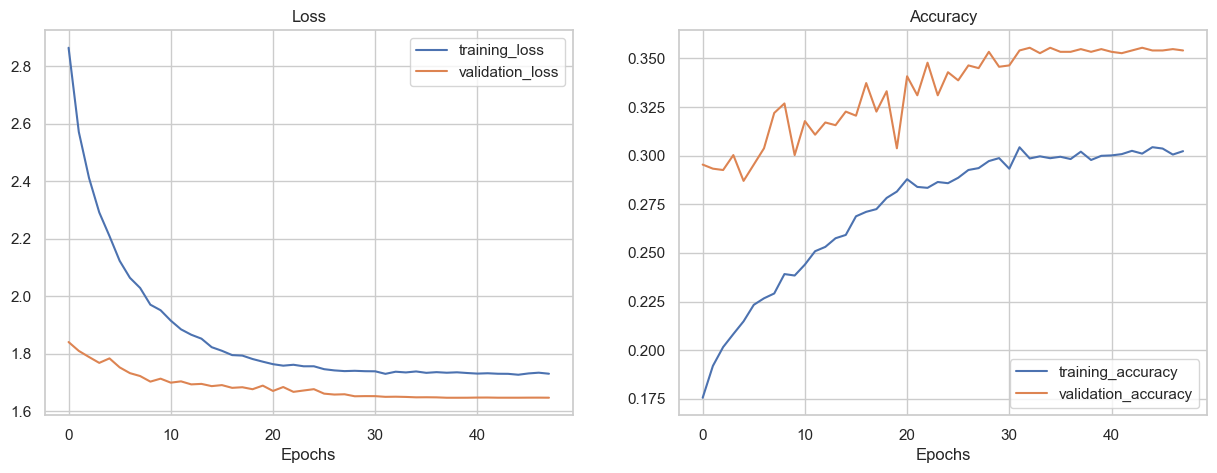

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


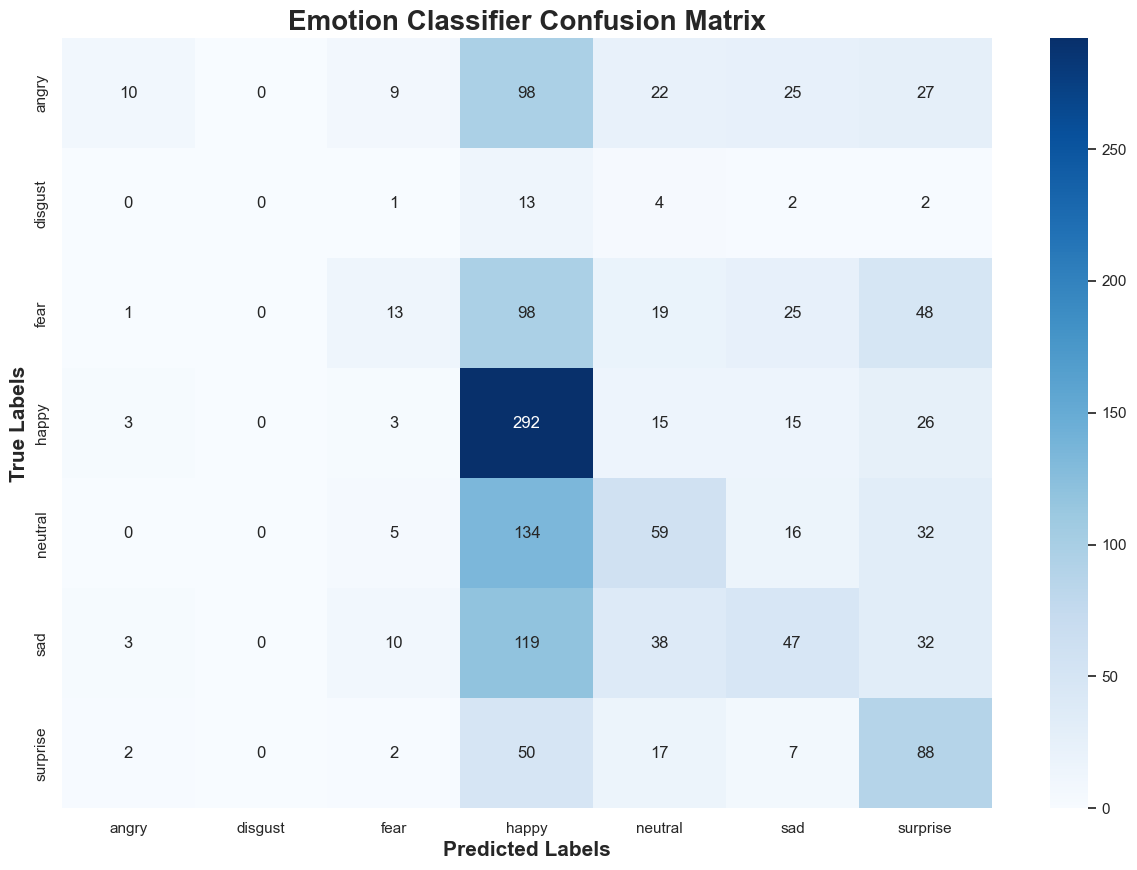

Classification Report:
              precision    recall  f1-score   support

       angry       0.53      0.05      0.10       191
     disgust       0.00      0.00      0.00        22
        fear       0.30      0.06      0.11       204
       happy       0.36      0.82      0.50       354
     neutral       0.34      0.24      0.28       246
         sad       0.34      0.19      0.24       249
    surprise       0.35      0.53      0.42       166

    accuracy                           0.36      1432
   macro avg       0.32      0.27      0.24      1432
weighted avg       0.36      0.36      0.29      1432



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_training_curves(history):
    """
    Plots the training and validation loss and accuracy curves.
    
    Parameters:
    history: History object returned by the fit method of the model.
    """
    train_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    train_accuracy = history.history["accuracy"]
    validation_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="training_loss")
    plt.plot(epochs, validation_loss, label="validation_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label="training_accuracy")
    plt.plot(epochs, validation_accuracy, label="validation_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

# Usage example with emotion classifier training history
plot_training_curves(training_history)

# Predicting and plotting the confusion matrix for the emotion classifier model
predicted_classes = emotion_classifier.predict(validation_images)

# Choosing highest probability class in every prediction
predicted_classes = np.argmax(predicted_classes, axis=1)

fig, ax = plt.subplots(figsize=(15, 10))
true_classes = validation_images.classes
class_labels = list(validation_images.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

ax.set_xlabel('Predicted Labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=15, fontweight='bold')
ax.set_title('Emotion Classifier Confusion Matrix', fontsize=20, fontweight='bold')

plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [97]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Constants and Paths
TRAINING_DATA_PATH = 'data/train/'
VALIDATION_DATA_PATH = 'data/test/'
IMAGE_SIZE = 48
BATCH_SIZE = 64
RANDOM_SEED = 42

# Set the seed for reproducibility
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data Augmentation and Preprocessing
train_image_generator = ImageDataGenerator(
    rescale=1. / 255,           # Normalize pixel values
    rotation_range=10,          # Randomly rotate images
    zoom_range=0.2,             # Randomly zoom into images
    width_shift_range=0.1,      # Randomly shift images horizontally
    height_shift_range=0.1,     # Randomly shift images vertically
    horizontal_flip=True,       # Randomly flip images horizontally
    validation_split=0.2        # Use 20% of data for validation
)

validation_image_generator = ImageDataGenerator(
    rescale=1. / 255,           # Normalize pixel values
    validation_split=0.2        # Use 20% of data for validation
)

# Load Training Data
train_images = train_image_generator.flow_from_directory(
    directory=TRAINING_DATA_PATH,
    class_mode="categorical",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale',
    shuffle=True,
    batch_size=BATCH_SIZE,
    subset='training',
)

# Load Validation Data
validation_images = validation_image_generator.flow_from_directory(
    directory=VALIDATION_DATA_PATH,
    class_mode="categorical",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode="grayscale",
    shuffle=False,
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Function to Create the CNN Model
def build_cnn_model(input_shape=(48, 48, 1)):
    model = Sequential()
    
    # CNN1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # CNN2
    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # CNN3
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # CNN4
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten and Fully Connected Layers
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and compile the model
emotion_cnn_model = build_cnn_model()

# Callbacks for Model Training
checkpoint_callback = ModelCheckpoint("cnn_model_checkpoint.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
final_model_saver_callback = ModelCheckpoint("final_cnn_model.keras", save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# List of Callbacks
callbacks_list = [checkpoint_callback, early_stopping_callback, reduce_lr_callback, final_model_saver_callback]

# Model Training
training_history = emotion_cnn_model.fit(
    train_images,
    validation_data=validation_images,
    epochs=60,
    batch_size=BATCH_SIZE,
    callbacks=callbacks_list,
)

# Evaluate the model on the validation data
validation_scores = emotion_cnn_model.evaluate(validation_images)
print("Validation Loss: {:.5f}".format(validation_scores[0]))
print("Validation Accuracy: {:.2f}%".format(validation_scores[1] * 100))

# Evaluate the model on the training data
training_scores = emotion_cnn_model.evaluate(train_images)
print("Training Loss: {:.5f}".format(training_scores[0]))
print("Training Accuracy: {:.2f}%".format(training_scores[1] * 100))

# Save the final model
emotion_cnn_model.save("final_cnn_model.keras")


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.1698 - loss: 9.6402
Epoch 1: val_accuracy improved from -inf to 0.22556, saving model to cnn_model_checkpoint.keras

Epoch 1: val_accuracy improved from -inf to 0.22556, saving model to final_cnn_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 254s 698ms/step - accuracy: 0.1698 - loss: 9.6393 - val_accuracy: 0.2256 - val_loss: 8.7792 - learning_rate: 1.0000e-04
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.2137 - loss: 8.5273
Epoch 2: val_accuracy improved from 0.22556 to 0.26187, saving model to cnn_model_checkpoint.keras

Epoch 2: val_accuracy improved from 0.22556 to 0.26187, saving model to final_cnn_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 274s 764ms/step - accuracy: 0.2137 - loss: 8.5267 - val_accuracy: 0.2619 - val_loss: 7.6552 - learning_rate: 1.0000e-04
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.2520 - loss: 7.5447
Epoch 3: val_accuracy improved from 0.26187 to 0.30377, saving mode

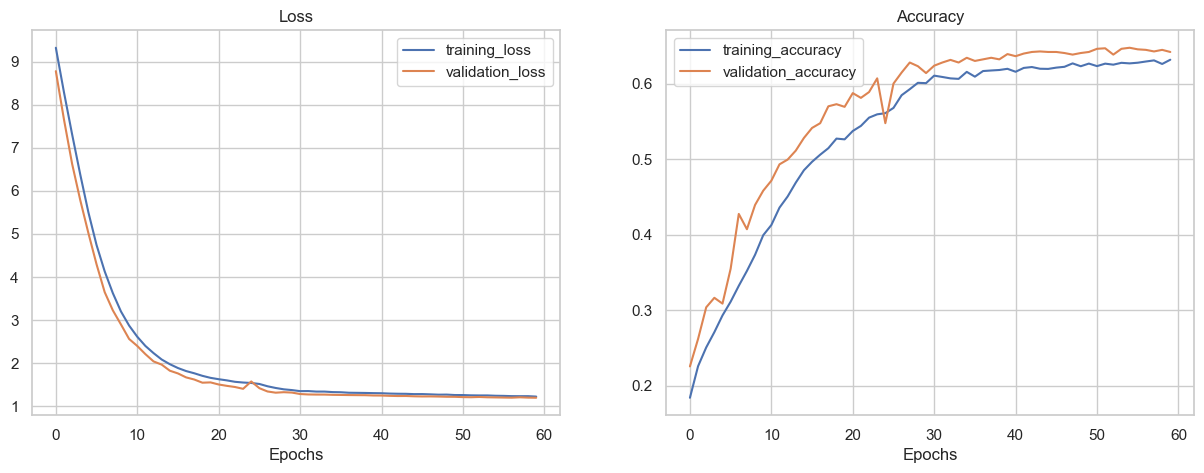

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step


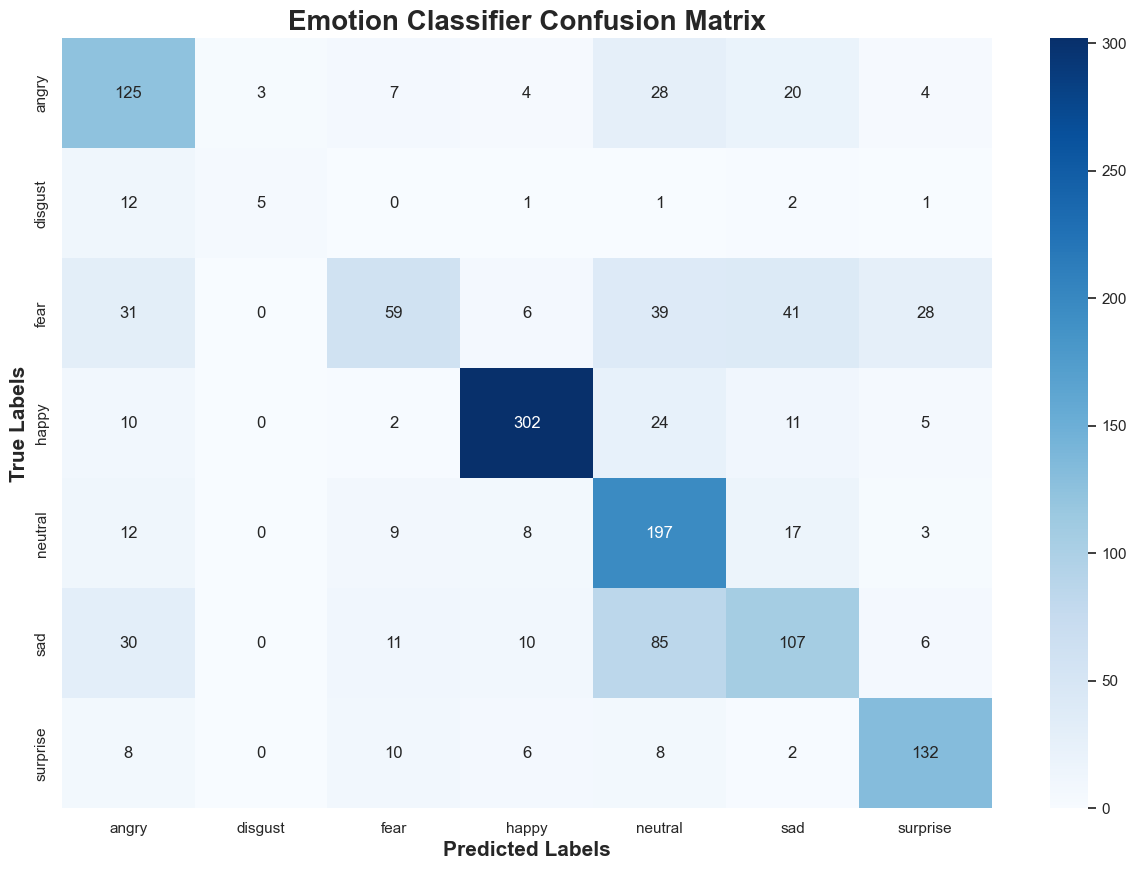

Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.65      0.60       191
     disgust       0.62      0.23      0.33        22
        fear       0.60      0.29      0.39       204
       happy       0.90      0.85      0.87       354
     neutral       0.52      0.80      0.63       246
         sad       0.54      0.43      0.48       249
    surprise       0.74      0.80      0.77       166

    accuracy                           0.65      1432
   macro avg       0.64      0.58      0.58      1432
weighted avg       0.66      0.65      0.64      1432



In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_training_curves(history):
    """
    Plots the training and validation loss and accuracy curves.
    
    Parameters:
    history: History object returned by the fit method of the model.
    """
    train_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    train_accuracy = history.history["accuracy"]
    validation_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="training_loss")
    plt.plot(epochs, validation_loss, label="validation_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label="training_accuracy")
    plt.plot(epochs, validation_accuracy, label="validation_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

# Usage example with emotion CNN model training history
plot_training_curves(training_history)

# Predicting and plotting the confusion matrix for the emotion CNN model
predicted_classes = emotion_cnn_model.predict(validation_images)

# Choosing highest probability class in every prediction
predicted_classes = np.argmax(predicted_classes, axis=1)

fig, ax = plt.subplots(figsize=(15, 10))
true_classes = validation_images.classes
class_labels = list(validation_images.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

ax.set_xlabel('Predicted Labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=15, fontweight='bold')
ax.set_title('Emotion Classifier Confusion Matrix', fontsize=20, fontweight='bold')

plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
